<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/boston_housing_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis of Boston Housing Price**

Import needed libraries

In [2]:
import numpy as np
from tensorflow import keras

Import dataset

In [3]:
from keras.datasets import boston_housing

In [4]:
(train_data, train_label),(test_data, test_label) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


Explore the dataset

In [5]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
len(train_data[0])

13

In [8]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
train_label[0]

15.2

Normalize the training and testing data

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


Build the model

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
def build_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
  model.add(Dense(64, activation = 'relu',))
  model.add(Dense(1))
  model.compile(loss = 'mse', optimizer = 'rmsprop', metrics =['mae'])
  return model

Validate the model using cross validation

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)

In [49]:
# split the training data using cross validation
# fit each split 
# append all validation mean absolute error for each fit
all_mae_history = []
for training_index, val_index in kf.split(train_data):
  x_train, y_train, x_val, y_val = train_data[training_index], train_label[training_index],train_data[val_index], train_label[val_index]
  model = build_model()
  history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 500, batch_size = 4)
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)

Epoch 1/500
76/76 [==============================] - 1s 3ms/step - loss: 444.1854 - mae: 19.2645 - val_loss: 123.3043 - val_mae: 8.7806
Epoch 2/500
76/76 [==============================] - 0s 2ms/step - loss: 82.2980 - mae: 6.9610 - val_loss: 28.5002 - val_mae: 3.4702
Epoch 3/500
76/76 [==============================] - 0s 2ms/step - loss: 23.8906 - mae: 3.5462 - val_loss: 22.4754 - val_mae: 3.2016
Epoch 4/500
76/76 [==============================] - 0s 2ms/step - loss: 23.7969 - mae: 3.3983 - val_loss: 17.9834 - val_mae: 2.7625
Epoch 5/500
76/76 [==============================] - 0s 2ms/step - loss: 20.3609 - mae: 3.0255 - val_loss: 16.6985 - val_mae: 2.9504
Epoch 6/500
76/76 [==============================] - 0s 2ms/step - loss: 20.8301 - mae: 3.2654 - val_loss: 14.9181 - val_mae: 2.5940
Epoch 7/500
76/76 [==============================] - 0s 2ms/step - loss: 13.4961 - mae: 2.6995 - val_loss: 14.0365 - val_mae: 2.7798
Epoch 8/500
76/76 [==============================] - 0s 2ms/step -

In [50]:
arr = np.array(all_mae_history)
arr.shape

(4, 500)

In [51]:
#aggregate the mean absolute error for each epoch
epochs = 500
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(epochs)]

Visualize model's performance

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

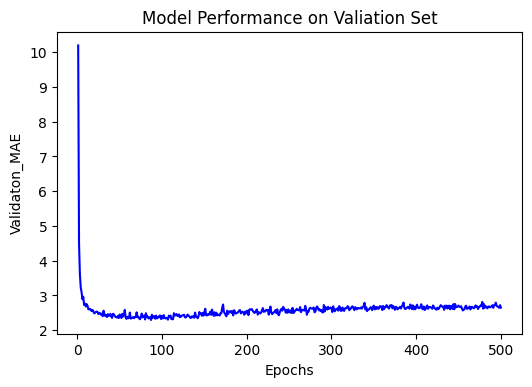

In [53]:
plt.figure(dpi=100)
plt.plot(range(1, epochs+ 1), average_mae_history, 'b' )
plt.xlabel('Epochs')
plt.ylabel('Validaton_MAE')
plt.title ('Model Performance on Valiation Set')
plt.show()

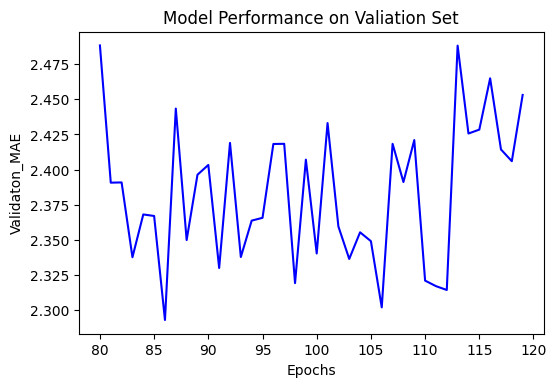

In [55]:
# zoom in to the regionof interest
plt.figure(dpi=100)
plt.plot(range(80, 120), average_mae_history[80:120], 'b' )
plt.xlabel('Epochs')
plt.ylabel('Validaton_MAE')
plt.title ('Model Performance on Valiation Set')
plt.show()

Adjust the model and re-fit the all the train data

In [58]:
model = build_model()
model.fit(train_data, train_label, epochs = 86, batch_size = 4)
test_mse_score, test_mae_score = model.evaluate(test_data, test_label) 

Epoch 1/86
101/101 [==============================] - 1s 1ms/step - loss: 436.7199 - mae: 18.3928
Epoch 2/86
101/101 [==============================] - 0s 1ms/step - loss: 50.2880 - mae: 5.2003
Epoch 3/86
101/101 [==============================] - 0s 888us/step - loss: 27.1857 - mae: 3.6774
Epoch 4/86
101/101 [==============================] - 0s 914us/step - loss: 23.0492 - mae: 3.1209
Epoch 5/86
101/101 [==============================] - 0s 986us/step - loss: 13.8267 - mae: 2.7466
Epoch 6/86
101/101 [==============================] - 0s 1ms/step - loss: 14.8084 - mae: 2.5952
Epoch 7/86
101/101 [==============================] - 0s 880us/step - loss: 14.4894 - mae: 2.5770
Epoch 8/86
101/101 [==============================] - 0s 1ms/step - loss: 15.2361 - mae: 2.6357
Epoch 9/86
101/101 [==============================] - 0s 1ms/step - loss: 9.5884 - mae: 2.2869
Epoch 10/86
101/101 [==============================] - 0s 987us/step - loss: 11.0875 - mae: 2.4413
Epoch 11/86
101/101 [=======

2.333493947982788

In [80]:
#show mean absoute error
test_mae_score

2.333493947982788

## **Regression analyis of the Boston Housing Price dataset using shallow learning**

Import required libraries

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

Hyper parameter Tuning

In [71]:
def find_best_model(x, y):
  config = {
        'linear regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
              'model' : Lasso(),
              'params' : {
                 'alpha' : [1.0, 2.0, 4.0, 5.0],
                 'normalize'  : [True, False],
                 'precompute' : [True, False],
                 'positive'   : [True, False],
                 'selection'  : ['cyclic', 'random']
             }
         },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params' : { 
                'criterion' : ["mse", "friedman_mse", "mae"],
                'splitter'  : ['best', 'random']
         }
        }
           
    }
  scores = []
  cv = ShuffleSplit(n_splits= 4, test_size= 0.2, random_state= 0)
  for model_name, model_params in config.items():
    clf = GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score= False, scoring = 'neg_mean_absolute_error')
    clf.fit(x,y)
    scores.append({
            'model' : model_name,
            'best_score' : (clf.best_score_  * -1),
            'best_params' : clf.best_params_
        })
  return pd.DataFrame(scores)

In [73]:
# show the best model and parameters after tuning
scores_df = find_best_model(train_data, train_label)
scores_df

,model,best_score,best_params
0,linear regression,3.391685,{'normalize': True}
1,lasso,3.801018,"{'alpha': 1.0, 'normalize': False, 'positive':..."
2,decision_tree,2.783025,"{'criterion': 'mae', 'splitter': 'best'}"


# Fit  the training data using the best model

In [84]:
model = DecisionTreeRegressor(criterion='mae')
model.fit(train_data, train_label)
y_predicted = model.predict(test_data)
mae =sklearn.metrics.mean_absolute_error(test_label, y_predicted)


In [85]:
#show mean absoute error of shallow learning
mae

3.6715686274509802

# **The deep learning (keras) model obtained a mean absolute error of 2.33 while the shalow learning (scikit learn)model obtained a model of 3.67 ** 